Naive Bayes Classifier

In [4]:
import math
import random
import pandas as pd
import numpy as np
df = pd.read_csv('D:\\Shlok\\College\\THIRD_YEAR\\SEM 6 NOTES\\DL\\Assignments\\Codes\\Assignment3\\Iris.csv')
df
flower_type  = df.groupby('Species')
flower_type.head()
sepallength_setosa = df.iloc[[0,49], 1]
setosa_sepallength_avg = np.mean(sepallength_setosa)
setosa_sepallength_std = np.std(sepallength_setosa)
print(setosa_sepallength_std)
 
sepalwidth_setosa = df.iloc[[0,49], 2]
setosa_sepalwidth_avg = np.mean(sepalwidth_setosa)
setosa_sepalwidth_std = np.std(sepalwidth_setosa)
print(setosa_sepalwidth_std)
 
petallength_setosa = df.iloc[[0,49], 3]
setosa_petallength_avg = np.mean(petallength_setosa)
setosa_petallength_std = np.std(petallength_setosa)
print(setosa_petallength_std)
 
petalwidth_setosa = df.iloc[[0,49], 4]
setosa_petalwidth_avg = np.mean(petalwidth_setosa)
setosa_petalwidth_std = np.std(petalwidth_setosa)
print(setosa_petalwidth_std)
 
sepallength_versicolor = df.iloc[[50,99], 1]
versicolor_sepallength_avg = np.mean(sepallength_versicolor)
versicolor_sepallength_std = np.std(sepallength_versicolor)
print(versicolor_sepallength_avg)
 
sepalwidth_versicolor = df.iloc[[50,99], 2]
versicolor_sepalwidth_avg = np.mean(sepalwidth_versicolor)
versicolor_sepalwidth_std = np.std(sepalwidth_versicolor)
print(versicolor_sepalwidth_avg)
 
petallength_versicolor = df.iloc[[50,99], 3]
versicolor_petallength_avg = np.mean(petallength_versicolor)
versicolor_petallength_std = np.std(petallength_versicolor)
print(versicolor_petallength_avg)
 
petalwidth_versicolor = df.iloc[[50,99], 4]
versicolor_petalwidth_avg = np.mean(petalwidth_versicolor)
versicolor_petalwidth_std = np.std(petalwidth_versicolor)
print(versicolor_petalwidth_avg)
sepallength_virginica = df.iloc[[100,149], 1]
virginica_sepallength_avg = np.mean(sepallength_virginica)
virginica_sepallength_std = np.std(sepallength_virginica)
print(virginica_sepallength_avg)
 
sepalwidth_virginica = df.iloc[[100,149], 2]
virginica_sepalwidth_avg = np.mean(sepalwidth_virginica)
virginica_sepalwidth_std = np.std(sepalwidth_virginica)
print(virginica_sepalwidth_avg)
 
petallength_virginica = df.iloc[[100,149], 3]
virginica_petallength_avg = np.mean(petallength_virginica)
virginica_petallength_std = np.std(petallength_virginica)
print(virginica_petallength_avg)
 
petalwidth_virginica = df.iloc[[100,149], 4]
virginica_petalwidth_avg = np.mean(petalwidth_virginica)
virginica_petalwidth_std = np.std(petalwidth_virginica)
print(virginica_petalwidth_avg)


0.04999999999999982
0.10000000000000009
0.0
0.0
6.35
3.0
4.4
1.35
6.1
3.15
5.55
2.15


In [5]:
def calculateGaussianProbability(x, mean, stdev):
    epsilon = 1e-10
    expo = math.exp(-(math.pow(x - mean, 2) / (2 * math.pow(stdev + epsilon, 2))))
    return (1 / (math.sqrt(2 * math.pi) * (stdev + epsilon))) * expo


In [6]:
def predict(features):
    classes = ['setosa', 'versicolor', 'virginica']
    
    # Priors - based on the proportion of each class in the dataset
    total_instances = len(df)
    class_priors = {
        'setosa': len(df[df['Species'] == 'setosa']) / total_instances,
        'versicolor': len(df[df['Species'] == 'versicolor']) / total_instances,
        'virginica': len(df[df['Species'] == 'virginica']) / total_instances
    }
    
    # Likelihoods (based on Gaussian PDF for each feature in each class)
    likelihoods = {
        'setosa': np.prod([
            calculateGaussianProbability(features[0], setosa_sepallength_avg, setosa_sepallength_std),
            calculateGaussianProbability(features[1], setosa_sepalwidth_avg, setosa_sepalwidth_std),
            calculateGaussianProbability(features[2], setosa_petallength_avg, setosa_petallength_std),
            calculateGaussianProbability(features[3], setosa_petalwidth_avg, setosa_petalwidth_std)
        ]),
        'versicolor': np.prod([
            calculateGaussianProbability(features[0], versicolor_sepallength_avg, versicolor_sepallength_std),
            calculateGaussianProbability(features[1], versicolor_sepalwidth_avg, versicolor_sepalwidth_std),
            calculateGaussianProbability(features[2], versicolor_petallength_avg, versicolor_petallength_std),
            calculateGaussianProbability(features[3], versicolor_petalwidth_avg, versicolor_petalwidth_std)
        ]),
        'virginica': np.prod([
            calculateGaussianProbability(features[0], virginica_sepallength_avg, virginica_sepallength_std),
            calculateGaussianProbability(features[1], virginica_sepalwidth_avg, virginica_sepalwidth_std),
            calculateGaussianProbability(features[2], virginica_petallength_avg, virginica_petallength_std),
            calculateGaussianProbability(features[3], virginica_petalwidth_avg, virginica_petalwidth_std)
        ])
    }
    
    # Calculate posterior probabilities for each class
    posteriors = {}
    for c in classes:
        posteriors[c] = class_priors[c] * likelihoods[c]
    
    # Return the class with the highest posterior probability
    return max(posteriors, key=posteriors.get)
new_instance = [5.1, 3.5, 1.4, 0.2]  # Example feature values for sepal_length, sepal_width, petal_length, petal_width
predicted_class = predict(new_instance)
print(f"Predicted class: {predicted_class}")


Predicted class: setosa


With Libaries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
# Load the iris dataset
iris = load_iris()

# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map(dict(zip(range(3), iris.target_names)))

# Display first few rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


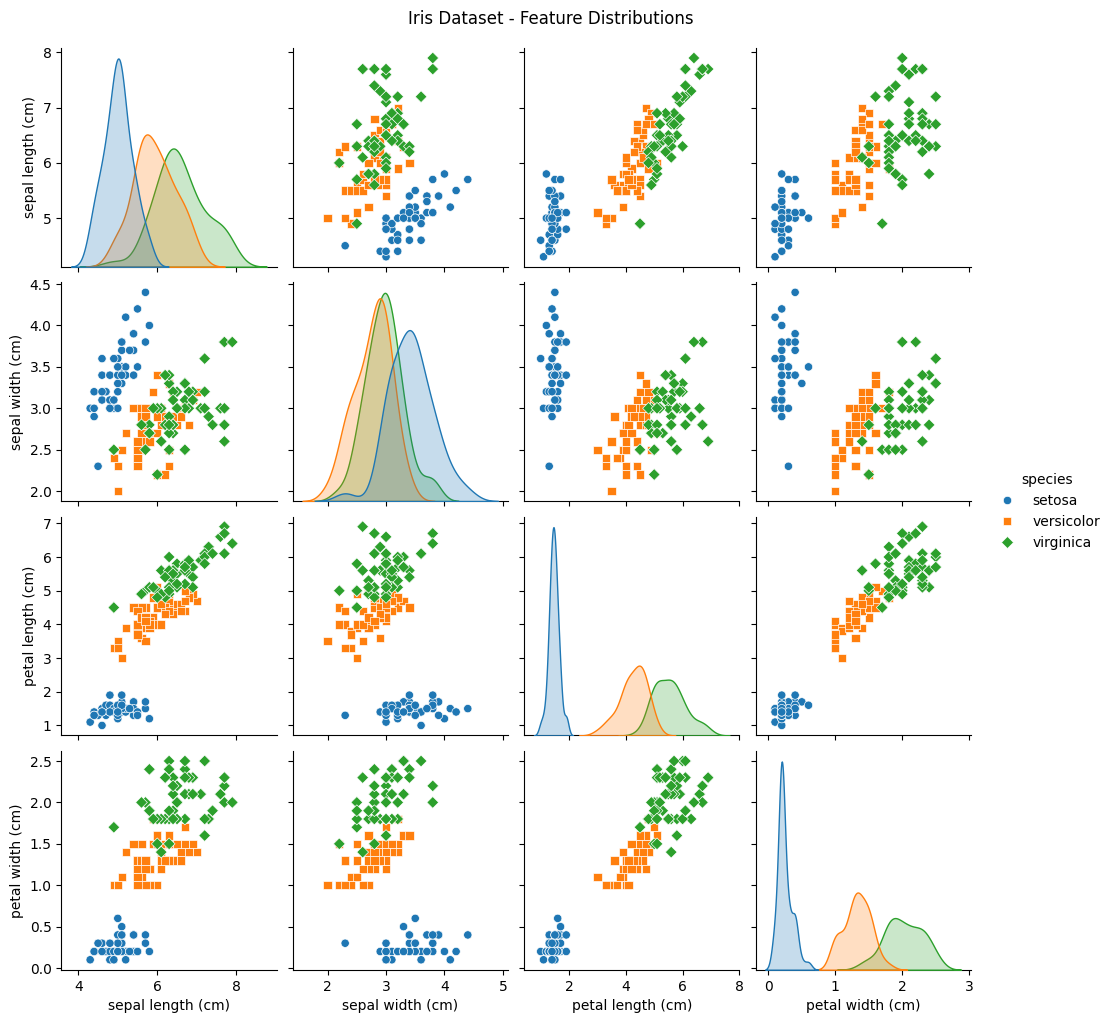

In [9]:
# Pairplot for visualizing feature relationships
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Iris Dataset - Feature Distributions", y=1.02)
plt.show()


In [10]:
# Features and Labels
X = iris.data
y = iris.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the model
model = GaussianNB()

# Train the model
model.fit(X_train, y_train)


GaussianNB()

In [12]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



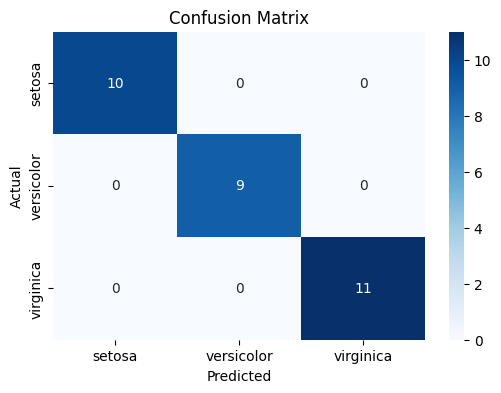

In [13]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
